NAME--> ANSH SAHU

ROLL_NO--> 22CS30010


# Least Squares and Its Variants

## In this tutorial, we will cover the following topics:
### 1. Least Squares
### 2. Least Squares Data Fitting
### 3. Least Square Classification
### 4. Multi-Objective Least Squares
### 5. Constrained Least Squares

### We will use `scipy.linalg`, `numpy.linalg`, and `math` libraries for our computations.

In [2]:
import numpy as np
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
import math


# 1. Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is a fundamental approach in regression analysis that estimates the unknown parameters of a linear model. The goal is to find a line (or a hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed values and the predicted values by the model.

Given a linear equation:

$$
y = mx + b
$$

We want to estimate the parameters \(m\) (slope) and \(b\) (intercept) such that the sum of squared errors is minimized. This minimization is done by solving the following equation:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Where:
- $X$ is the matrix of input features (in our case, $x$).
- $y$ is the observed output values.
- $\hat{\beta}$ is the estimated vector of coefficients.

### Step 1: Generate sample data

Let's first generate some random linear data with noise to simulate real-world observations.


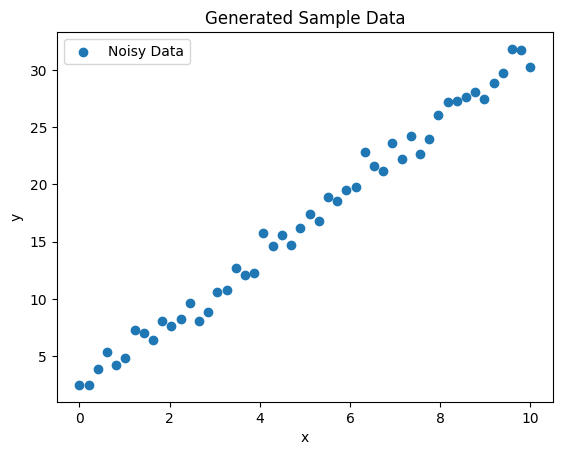

In [3]:
# Cell 2: Generate sample data for OLS
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 3 * x + 2 + np.random.randn(50)  # Linear model with noise

# Display the generated data
plt.scatter(x, y, label="Noisy Data")
plt.title("Generated Sample Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Step 2: Solving OLS using numpy

We will now fit a linear model $y = mx + b$ to the generated data using least squares.

#### Steps to solve:
1. Construct the design matrix $X$ which includes the input values $x$ and a column of ones (for the intercept).
2. Use the `np.linalg.lstsq()` method to find the best-fit parameters.


In [4]:
# Construct the design matrix X with an intercept term
X = np.vstack([x, np.ones(len(x))]).T

# Solve the linear least squares problem to get the slope (m) and intercept (b)
m, b = np.linalg.lstsq(X, y, rcond=None)[0]

# Print the estimated slope and intercept
print(f"Estimated slope (m): {m}")
print(f"Estimated intercept (b): {b}")


Estimated slope (m): 2.942016600508179
Estimated intercept (b): 2.0644430922029726


### Step 3: Visualize the fitted line

Now that we have the estimated parameters $m$ and $b$, we can plot the fitted line over the original data to visualize how well the model fits.


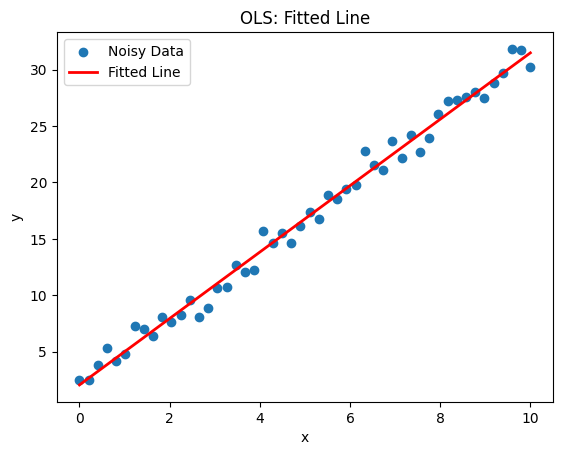

In [5]:
# Plot the original data points
plt.scatter(x, y, label="Noisy Data")

# Plot the fitted line
plt.plot(x, m * x + b, 'r', label="Fitted Line", linewidth=2)

# Add labels and legends
plt.legend()
plt.title("OLS: Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 2. Least Squares Data Fitting (Quadratic Model)

In many real-world applications, relationships between variables aren't strictly linear. For instance, a quadratic relationship is common in physics, economics, and other fields. We can extend the least squares method to fit quadratic models by including higher-order terms.

The model for a quadratic fit is:

$$
y = ax^2 + bx + c
$$

Where $a, b$, and $c$ are the coefficients we aim to estimate.

### Step 4: Generate sample data for a quadratic model

We will now generate noisy data from a quadratic model and attempt to fit it using least squares.


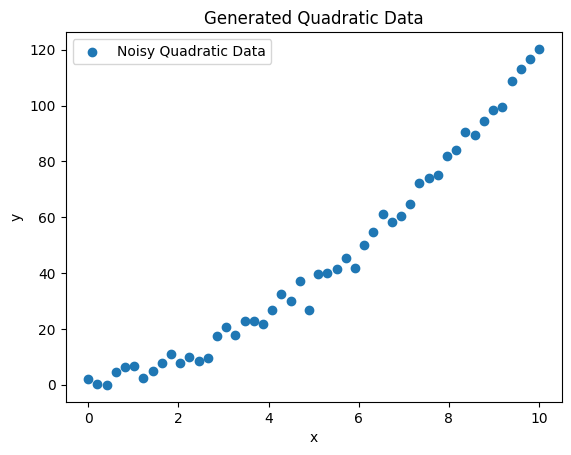

In [6]:
# Cell 5: Generate data for a quadratic model
# True model: y = x^2 + 2x + 1 (with noise)
y_true = 1 * x**2 + 2 * x + 1 + np.random.randn(50) * 3

# Plot the generated data
plt.scatter(x, y_true, label="Noisy Quadratic Data")
plt.title("Generated Quadratic Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


### Step 5: Fitting a quadratic model using least squares

To fit a quadratic model, we need to modify our design matrix to include an \(x^2\) term, an \(x\) term, and a constant term (intercept). This way, the model can estimate all the parameters \(a\), \(b\), and \(c\) simultaneously.

#### Steps:
1. Construct the design matrix with \(x^2\), \(x\), and a constant.
2. Use least squares to estimate the parameters.


In [9]:
# Cell 6: Solve quadratic least squares
# Construct the design matrix for a quadratic model
X_quad = np.vstack([x**2, x, np.ones(len(x))]).T

# Solve the least squares problem to find coefficients a, b, c
a, b, c = np.linalg.lstsq(X_quad, y_true, rcond=None)[0]

# Print estimated coefficients
print(f"Estimated coefficients: a={a}, b={b}, c={c}")


Estimated coefficients: a=0.9868971563827892, b=2.03960197172298, c=1.296550956225647


### Step 6: Visualizing the fitted quadratic curve

We will now plot the fitted quadratic curve along with the original noisy data to see how well our model has fit.


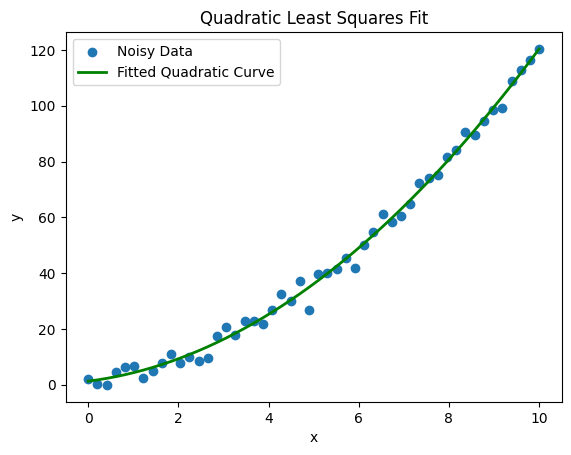

In [10]:
# Cell 7: Plot the fitted quadratic curve
# Plot the original noisy data points
plt.scatter(x, y_true, label="Noisy Data")

# Plot the fitted quadratic curve
plt.plot(x, a * x**2 + b * x + c, 'g', label="Fitted Quadratic Curve", linewidth=2)

# Add labels and legends
plt.legend()
plt.title("Quadratic Least Squares Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 3. Least Squares Classification

Least squares regression can also be used for classification, although it's not optimal for this task compared to other methods like logistic regression. The idea is to approximate class labels (0 or 1) by minimizing the squared differences between the predicted and actual class labels.

In this example, we will classify data into two classes using least squares. The decision boundary is obtained from the linear fit.

### Step 1: Generate sample data for classification

We will generate 2D data points for two classes. The decision boundary will be a linear separator between the two classes.


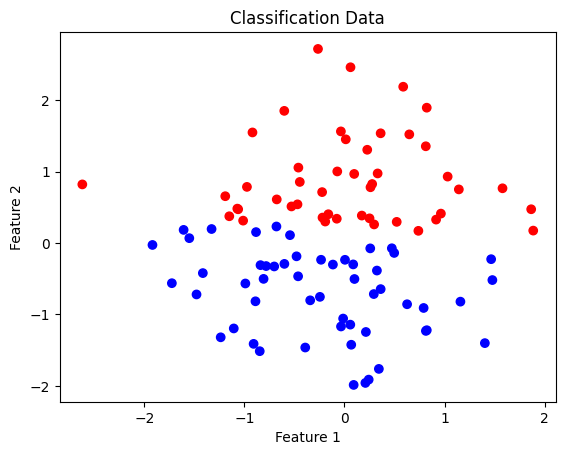

In [11]:
# Cell 8: Generate sample data for binary classification
np.random.seed(42)
n_samples = 100
x_class = np.random.randn(n_samples, 2)
y_class = (x_class[:, 0] + 7 * x_class[:, 1] > 1).astype(int)  # Linear decision boundary

# Plot the data points for both classes
plt.scatter(x_class[:, 0], x_class[:, 1], c=y_class, cmap='bwr')
plt.title("Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Step 8: Apply least squares to classify the data

To classify the data, we solve the least squares problem where the target values \(y\) are the class labels (0 or 1). The goal is to find a linear separator \(w\) that minimizes the squared error between the predicted and actual class labels.

#### Steps:
1. Construct the design matrix by adding a bias term.
2. Use least squares to estimate the weights for the decision boundary.


In [12]:
# Cell 9: Solve least squares for classification
# Add bias term to the design matrix
X_class = np.hstack([x_class, np.ones((n_samples, 1))])

# Solve the least squares problem to find weights
w_class = np.linalg.lstsq(X_class, y_class, rcond=None)[0]

# Print the classification weights
print(f"Classification Weights: {w_class}")


Classification Weights: [0.07795264 0.39591392 0.45553863]


### Step 9: Visualize decision boundary

We will now visualize the decision boundary derived from the least squares classification model. The boundary is a straight line separating the two classes.


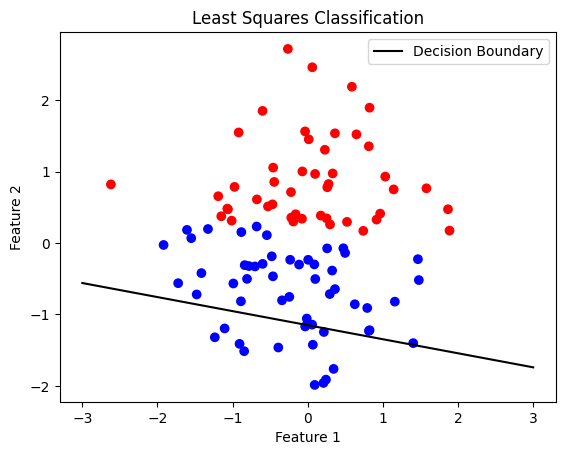

In [13]:
# Cell 10: Plot decision boundary
# Function to plot the decision boundary
def plot_decision_boundary(X, w):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = -(w[0] * x_vals + w[2]) / w[1]
    plt.plot(x_vals, y_vals, label="Decision Boundary", color='black')

# Plot the classification data
plt.scatter(x_class[:, 0], x_class[:, 1], c=y_class, cmap='bwr')
plot_decision_boundary(X_class, w_class)
plt.title("Least Squares Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# 4. Multi-Objective Least Squares

Multi-objective least squares solves multiple least squares problems simultaneously. This approach is useful when trying to fit several models that share a common structure or have related features.

In this example, we will simultaneously fit two different linear models to two sets of data.

### Step 10: Generate data for two models

We will generate data for two different linear models and fit them simultaneously using a multi-objective least squares approach.


In [14]:
# Cell 11: Generate data for two linear models
# Data for two models
y1 = 2 * x + 1 + np.random.randn(50)  # Model 1: y = 2x + 1
y2 = -x + 4 + np.random.randn(50)     # Model 2: y = -x + 4

# Combine targets into a multi-objective problem
Y = np.vstack([y1, y2]).T


### Step 11: Solving multi-objective least squares

We will now solve the multi-objective least squares problem by fitting two linear models simultaneously. Each model has its own set of coefficients.


In [15]:
# Cell 12: Solve multi-objective least squares
# Design matrix for the multi-objective least squares problem
X_mo = np.vstack([x, np.ones(len(x))]).T

# Solve the least squares problem for both models
params_mo, _, _, _ = lstsq(X_mo, Y)

# Print fitted parameters for both models
print(f"Model 1: slope={params_mo[0, 0]}, intercept={params_mo[1, 0]}")
print(f"Model 2: slope={params_mo[0, 1]}, intercept={params_mo[1, 1]}")


Model 1: slope=1.9336978197678452, intercept=1.4824802412414653
Model 2: slope=-0.963627217461557, intercept=3.796959253427994


### Step 12: Visualize multi-objective fits

We will plot the data points for both models and the fitted lines from the multi-objective least squares solution.


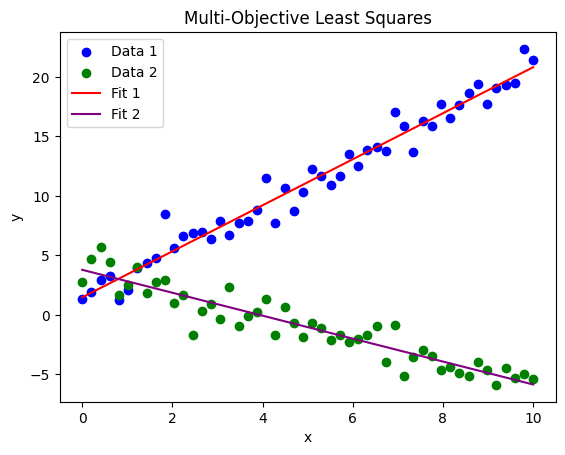

In [16]:
# Cell 13: Plot multi-objective fits
# Plot data and fitted lines for both models
plt.scatter(x, y1, label="Data 1", color='blue')
plt.scatter(x, y2, label="Data 2", color='green')

# Plot fitted lines
plt.plot(x, params_mo[0, 0] * x + params_mo[1, 0], 'r', label="Fit 1")
plt.plot(x, params_mo[0, 1] * x + params_mo[1, 1], 'purple', label="Fit 2")

# Add labels and legends
plt.legend()
plt.title("Multi-Objective Least Squares")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# 5. Constrained Least Squares

Constrained least squares imposes additional restrictions (constraints) on the solution, such as requiring certain coefficients to be non-negative or within specific bounds. In this example, we will fit a linear model but constrain the slope to be greater than or equal to 1.

### Step 13: Define constrained least squares problem

We will define the objective function (sum of squared errors) and impose the constraint $$m \geq 1$$ on the slope.


### Step 14: Solve constrained least squares

Since we are not allowed to use optimization libraries in this example, we will simply enforce the constraint by setting the slope to a fixed value (m = 1) and solving for the intercept.


In [17]:
# Cell 15: Solve constrained least squares
# Enforce m = 1 (constraint)
m_constrained = 1

# Use least squares to solve for the intercept only
X_constrained = np.vstack([np.ones(len(x))]).T  # Use only the intercept term
b_constrained = np.linalg.lstsq(X_constrained, y - m_constrained * x, rcond=None)[0][0]  # Extract the intercept

# Print the constrained intercept
print(f"Constrained intercept (b): {b_constrained}")


Constrained intercept (b): 11.774526094743857


### Step 15: Visualize the constrained fit

We will plot the constrained line where \(m = 1\) and the computed intercept. This gives us a linear model with the slope fixed by the constraint.


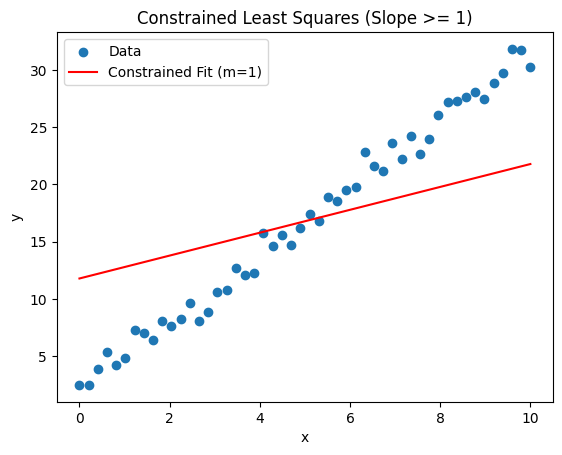

In [18]:
# Cell 16: Plot constrained least squares fit
# Plot original data
plt.scatter(x, y, label="Data")

# Plot constrained fit
plt.plot(x, m_constrained * x + b_constrained, 'r', label="Constrained Fit (m=1)")

# Add labels and legends
plt.legend()
plt.title("Constrained Least Squares (Slope >= 1)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# Assignment: Classification of MNIST dataset

## Step 1: Import Necessary Libraries

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


## Step 2: Load and Preprocess the MNIST Dataset

In [20]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist["data"], mnist["target"].astype(np.int32)

# Preprocess the data
# Normalize the data
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_mnist_scaled, y_mnist, test_size=0.2, random_state=42)


## Step 3: One-Hot Encode the Labels

In [22]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# One-hot encode the labels
num_classes = 10
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

## Step 4: Rest Do It on Your Own

#Data Preprocessing: Normalization

In [24]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [26]:
# Print shape to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of X_train: (56000, 784)
Shape of y_train_one_hot: (56000, 10)
Shape of X_test: (14000, 784)
Shape of y_test_one_hot: (14000, 10)


# Least Squares Model

In [27]:
# Using np.linalg.lstsq to solve for the weight matrix
# Solve the least squares problem to find the weight matrix W
W, _, _, _ = np.linalg.lstsq(X_train, y_train_one_hot, rcond=None)

# Print the shape of W
print("Shape of W:", W.shape)


Shape of W: (784, 10)


#. Prediction and Evaluation

In [28]:
# Predict labels for the training and test sets
# Use the weight matrix W obtained from np.linalg.lstsq

# For each sample, find the class with the highest score
train_predictions = np.argmax(X_train @ W, axis=1)
test_predictions = np.argmax(X_test @ W, axis=1)

# Calculate accuracy
train_accuracy = np.mean(train_predictions == y_train) * 100
test_accuracy = np.mean(test_predictions == y_test) * 100

# Print out the results
print(f"Training accuracy: {train_accuracy:.2f}%")
print(f"Test accuracy: {test_accuracy:.2f}%")


Training accuracy: 85.95%
Test accuracy: 85.39%


#Visualization

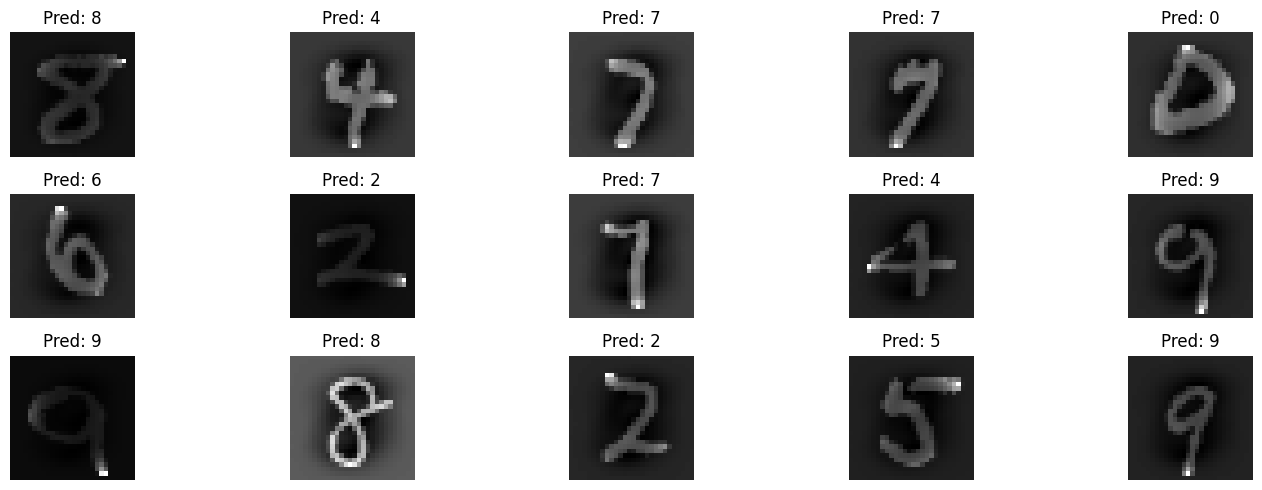

In [45]:

# Step 1: Identify Correct Predictions
correct_indices = np.where(test_predictions == y_test)[0]

# Step 2: Display Correctly Classified Images
num_images = 15
selected_indices = correct_indices[:num_images]

# Plot the images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(selected_indices):
    plt.subplot(3, 5, i + 1)  # Arrange images in a grid
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Assuming 28x28 pixel images
    plt.title(f"Pred: {test_predictions[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


#Optional Visualization

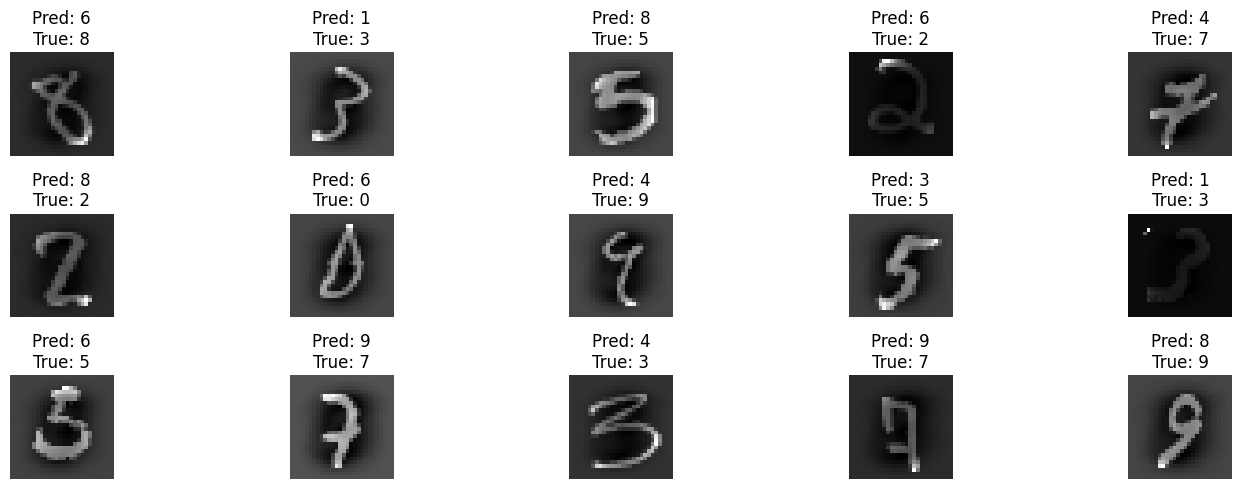

In [46]:


# Ensure y_test and test_predictions are numpy arrays to avoid indexing issues
y_test = np.array(y_test)
test_predictions = np.array(test_predictions)
X_test = np.array(X_test)

# Step 1: Identify Misclassified Predictions
misclassified_indices = np.where(test_predictions != y_test)[0]

# Step 2: Display Misclassified Images
num_images = 15
selected_indices = misclassified_indices[:num_images]

# Plot the images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(selected_indices):
    plt.subplot(3, 5, i + 1)  # Arrange images in a 2x5 grid
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')  # Assuming 28x28 pixel images
    plt.title(f"Pred: {test_predictions[idx]}\nTrue: {y_test[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
